In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('text_emotion.csv')
data.head()

Unnamed: 0                                            content sentiment
0           0                            i didnt feel humiliated   sadness
1           1  i can go from feeling so hopeless to so damned...   sadness
2           2   im grabbing a minute to post i feel greedy wrong     anger
3           3  i am ever feeling nostalgic about the fireplac...      love
4           4                               i am feeling grouchy     anger

In [45]:
data = data.drop(data.columns[0], axis=1)

In [47]:
data.head()

content sentiment
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger

In [48]:
data

content  sentiment
0                                i didnt feel humiliated    sadness
1      i can go from feeling so hopeless to so damned...    sadness
2       im grabbing a minute to post i feel greedy wrong      anger
3      i am ever feeling nostalgic about the fireplac...       love
4                                   i am feeling grouchy      anger
...                                                  ...        ...
58298                        succesfully following tayla  happiness
58299                              happy mother day love       love
58300  happy mother's day mommy woman man long momma ...       love
58301  wassup beautiful follow peep new hit single ww...  happiness
58302  bullet train tokyo gf visiting japan since thu...       love

[58303 rows x 2 columns]

In [50]:
sentiment = data.pop('sentiment')
data['sentiment'] = sentiment
data.head()

content sentiment
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58303 entries, 0 to 58302
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    58303 non-null  object
 1   sentiment  58303 non-null  object
dtypes: object(2)
memory usage: 911.1+ KB


In [52]:
data.isna().sum()

content      0
sentiment    0
dtype: int64

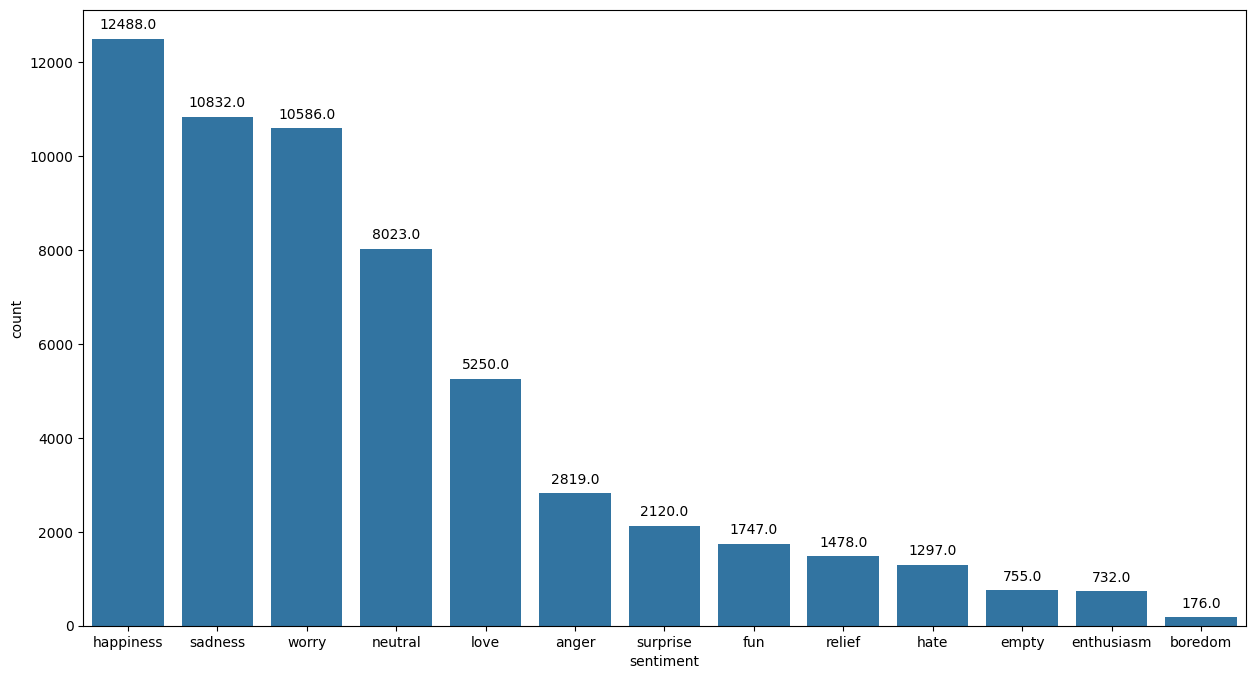

In [53]:
sentiment = data['sentiment'].value_counts()
sentiment_order = list(sentiment.index)

plt.figure(figsize=(15, 8))

ax = sns.countplot(x='sentiment', data=data, order=sentiment_order)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

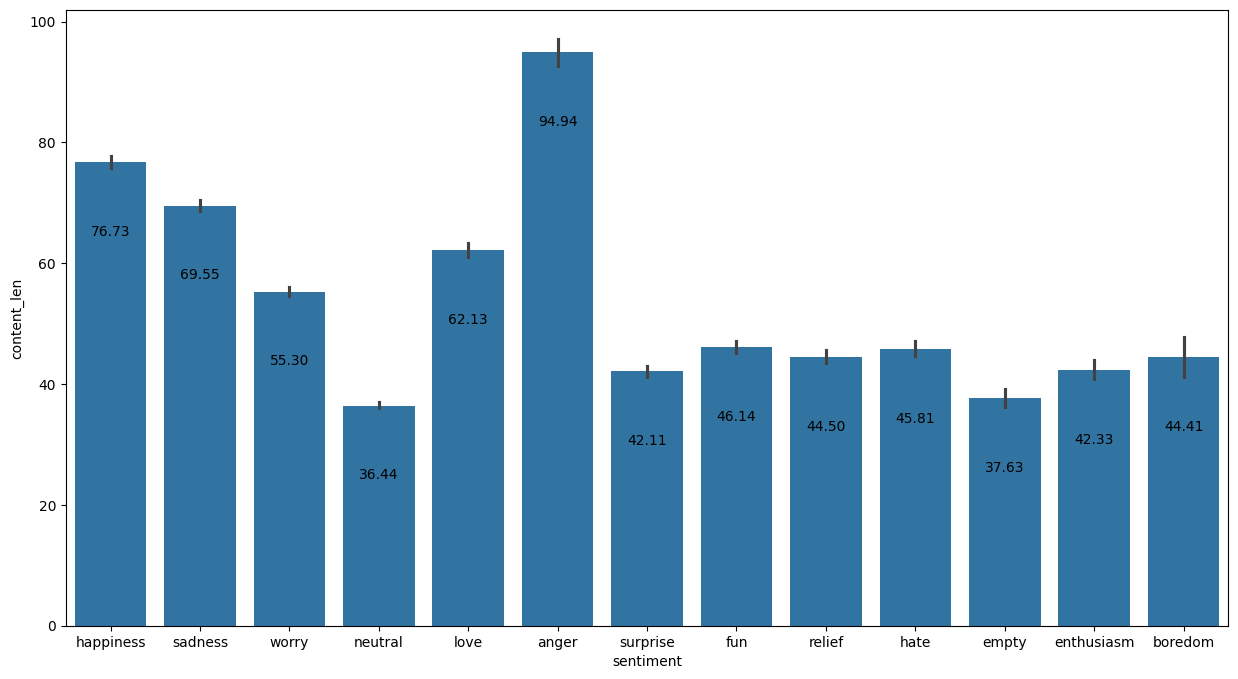

In [54]:
df = data.copy()
df['content_len'] = df['content'].apply(len)

# table
sentiment_grouped_mean_len = df.groupby('sentiment')['content_len'].mean()
sgmlen_transpose = sentiment_grouped_mean_len.to_frame().transpose()
# type(sentiment_grouped_mean_len)

plt.figure(figsize=(15,8))

ax = sns.barplot(data=df, x='sentiment', y='content_len', estimator=np.mean, order=sentiment_order)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -50), 
                textcoords = 'offset points')
    
plt.show()

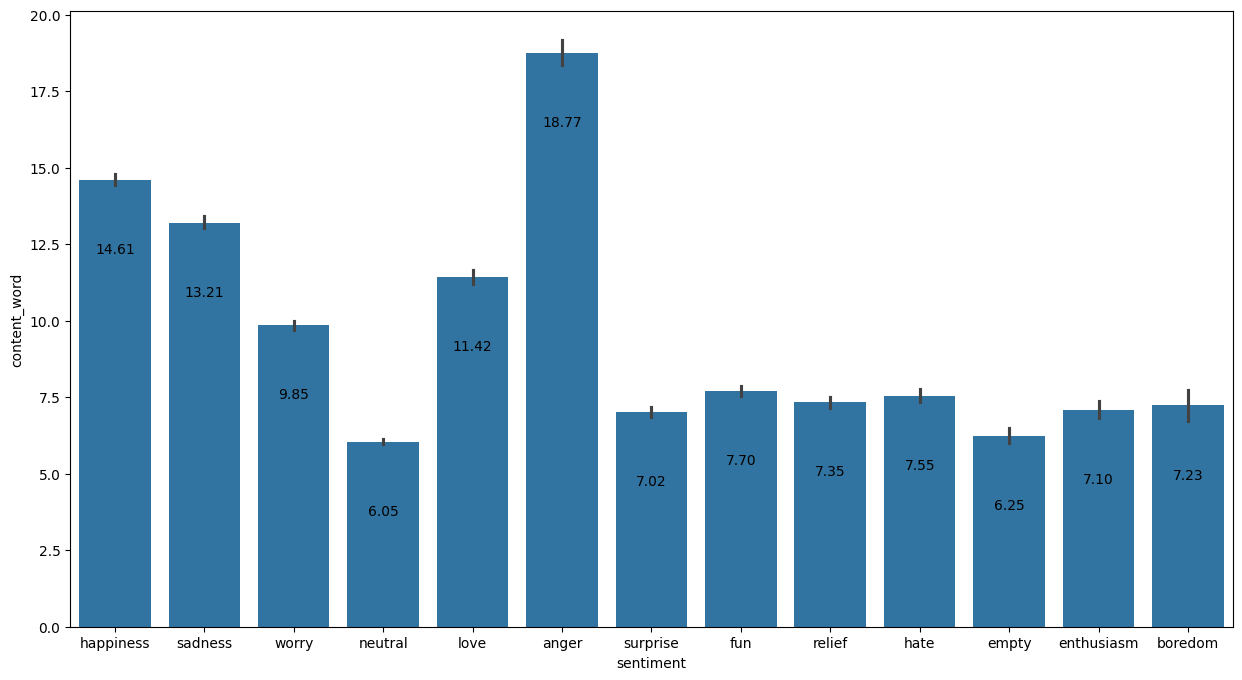

In [55]:
#Data Visualisation

df['content_word'] = data['content'].apply(lambda x: len(x.split()))

# table
sentiment_grouped_mean_word = df.groupby('sentiment')['content_word'].mean()
sgmword_transpose = sentiment_grouped_mean_word.to_frame().transpose()

'''
 print(tabulate(sgmword_transpose.reindex(columns=sentiment_order),
               headers='keys',
               numalign='center',
               stralign='center',
               tablefmt='simple',
               showindex=False))
'''

# barplot
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df, x='sentiment', y='content_word', estimator=np.mean, order=sentiment_order)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, -50), 
                textcoords = 'offset points')
    
#Data Visualisation
 #plt.show()

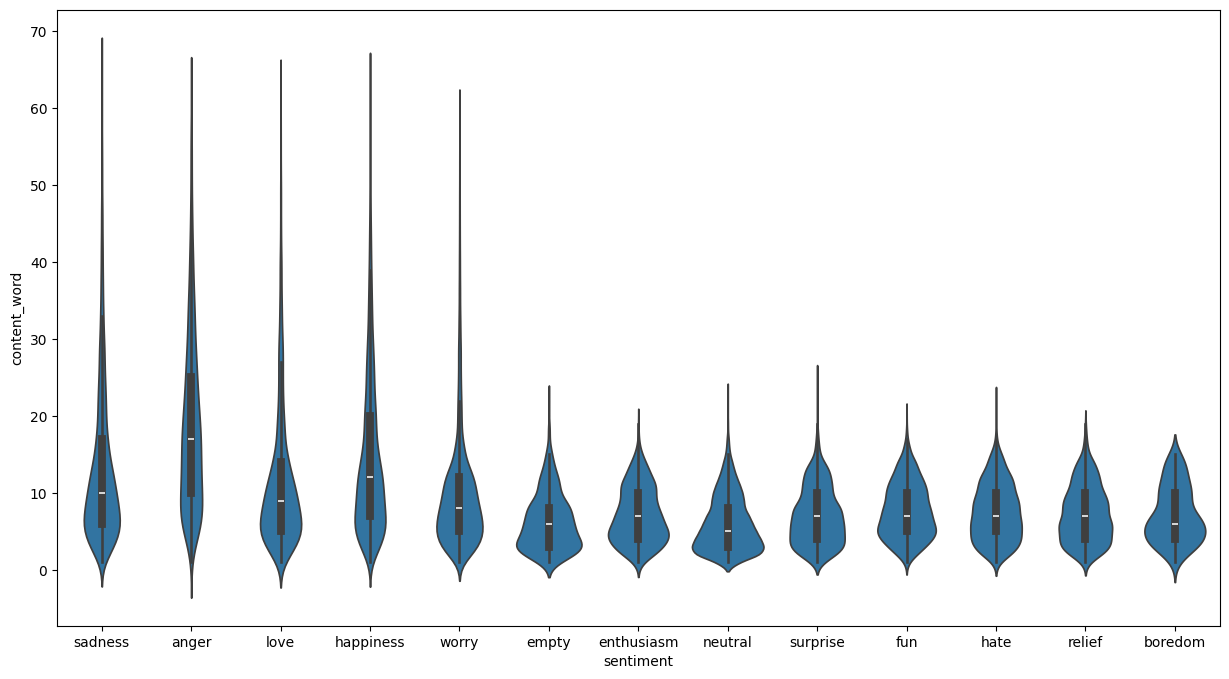

In [56]:
# Data Visualisation

plt.figure(figsize=(15,8))
sns.violinplot(x='sentiment', y = 'content_word', data=df)
plt.show;

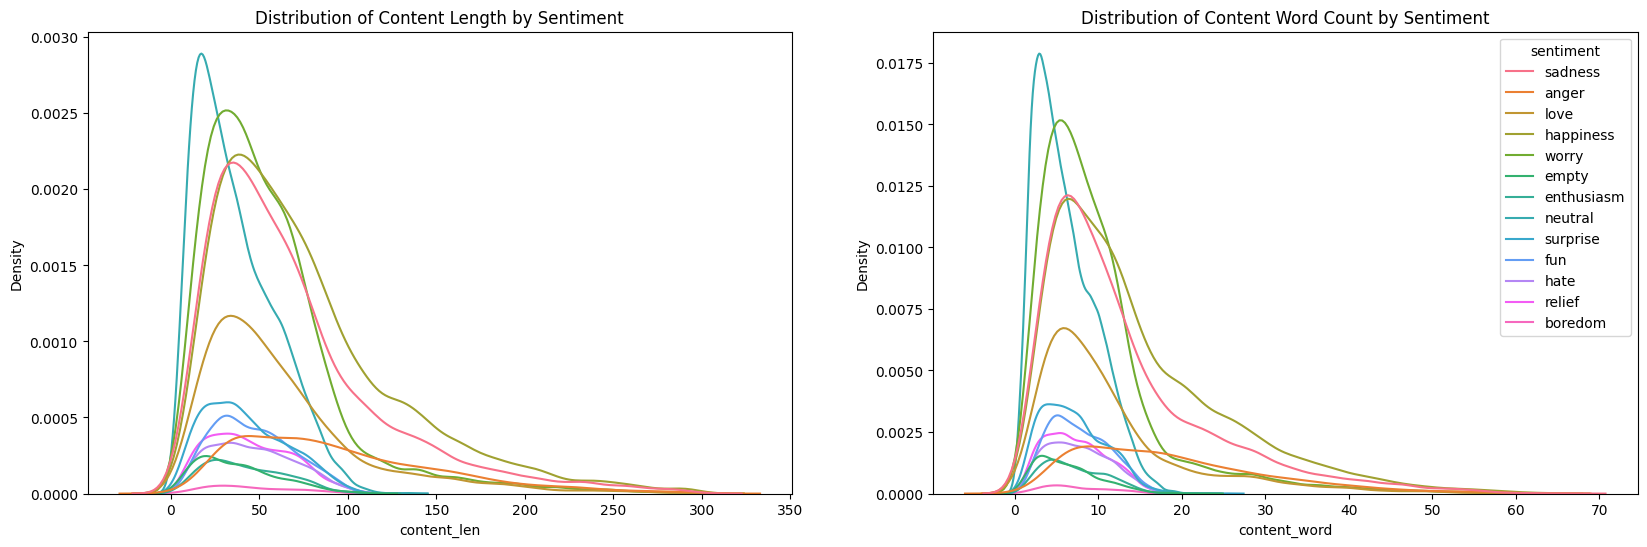

In [57]:
# Data Visualisation

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.kdeplot(x=df['content_len'], hue=df['sentiment'], ax=ax[0], label='content len', legend=False)
ax[0].set_title('Distribution of Content Length by Sentiment')
sns.kdeplot(x=df['content_word'], hue=df['sentiment'], ax=ax[1], label='content word')
ax[1].set_title('Distribution of Content Word Count by Sentiment')

plt.show()

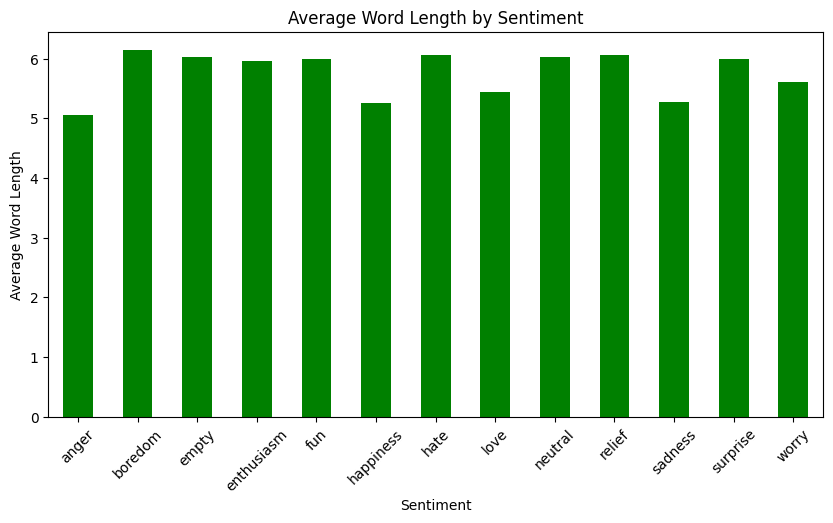

In [58]:
# Data Visualisation

# # mean word length for each category.

grouped = df.groupby('sentiment')[['content_len', 'content_word']].sum()  # Use double brackets for a list
grouped['avg_word_len'] = grouped['content_len'] / grouped['content_word']

plt.figure(figsize=(10,5))
ax = grouped['avg_word_len'].plot(kind='bar', color='green')
ax.set_xticklabels(grouped.index, rotation=45)

plt.title('Average Word Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Length')

plt.show()


In [59]:
# The number of tweets starting with '@'
count = sum(data['content'].str.startswith('@'))
print(f'The number of replies: {count}')

The number of replies: 0


In [60]:
df_clean = data.copy()

In [64]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import re
import string
import contractions
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english'))

def expand_contractions(text):
    '''
    Function replaces abbreviations with full word versions
    '''
    return contractions.fix(text)

def clean_content(text):
    
    text = expand_contractions(text)
    # remove twitter handles
    clean_text = re.sub(r'@\w+\s?', '', text)
    
    # convert to lowercase
    clean_text = clean_text.lower()
    
    # remove links http:// or https://
    clean_text = re.sub(r'https?:\/\/\S+', '', clean_text)
    
    # remove links beginning with www. and ending with .com
    clean_text = re.sub(r'www\.[a-z]?\.?(com)+|[a-z]+\.(com)', '', clean_text)
    
    # remove html reference characters
    clean_text = re.sub(r'&[a-z]+;', '', clean_text)
    
    # remove non-letter characters besides spaces "/", ";" "[", "]" "=", "#"
    clean_text = re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', clean_text)   
    
    clean_text = clean_text.split()
    
    # remove stop words
    clean_lst = []
    for word in clean_text:
      if word not in stop_words and not word.startswith(('http', '@', 'www.')) and not word.endswith('.com'):
        clean_lst.append(word)
    
    lemmatized_words = []
    for word in clean_lst:
      '''
      # Assign a tag to each part of speech
      tag = pos_tag([word])[0][1][0].upper()
      tag_dict = {'J': wordnet.ADJ,
                  'N': wordnet.NOUN,
                  'V': wordnet.VERB,
                  'R': wordnet.ADV}
      pos = tag_dict.get(tag, wordnet.NOUN)
      
      # lemmatization
      lemmatized_word = WordNetLemmatizer().lemmatize(word, pos)
      '''
      lemmatized_word = WordNetLemmatizer().lemmatize(word)
      lemmatized_words.append(lemmatized_word)

    return ' '.join(lemmatized_words)

df_clean['content'] = df_clean['content'].apply(lambda x :  clean_content(x))

# delete duplicates
df_clean.drop_duplicates(subset='content', inplace=True)
df_clean.reset_index(drop=True, inplace=True)

# delete small sentence
df_clean = df_clean.loc[df_clean['content'].apply(lambda x: len(x) >= 3)]

# splitting into tokens, features of the structure of the text used in Twitter
df_clean['content'] = df_clean['content'].apply(TweetTokenizer().tokenize)

# remove punctuation marks
PUNCTUATION_LIST = list(string.punctuation)
def remove_punctuation(word_list):
    return [w for w in word_list if w not in PUNCTUATION_LIST]
df_clean['content'] = df_clean['content'].apply(remove_punctuation)
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join(x))


df_clean.info()
df_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91620\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
Index: 57997 entries, 0 to 58000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    57997 non-null  object
 1   sentiment  57997 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


content sentiment
0                                    feel humiliated   sadness
1  go feeling hopeless damned hopeful around some...   sadness
2             grabbing minute post feel greedy wrong     anger
3  ever feeling nostalgic fireplace know still pr...      love
4                                    feeling grouchy     anger

In [65]:
df_clean

content  sentiment
0                                        feel humiliated    sadness
1      go feeling hopeless damned hopeful around some...    sadness
2                 grabbing minute post feel greedy wrong      anger
3      ever feeling nostalgic fireplace know still pr...       love
4                                        feeling grouchy      anger
...                                                  ...        ...
57996                        succesfully following tayla  happiness
57997                              happy mother day love       love
57998  happy mother's day mommy woman man long momma ...       love
57999  wassup beautiful follow peep new hit single ww...  happiness
58000  bullet train tokyo gf visiting japan since thu...       love

[57997 rows x 2 columns]

In [66]:
nltk.download('omw-1.4')
#ntlk.download('wordnet')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91620\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91620\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

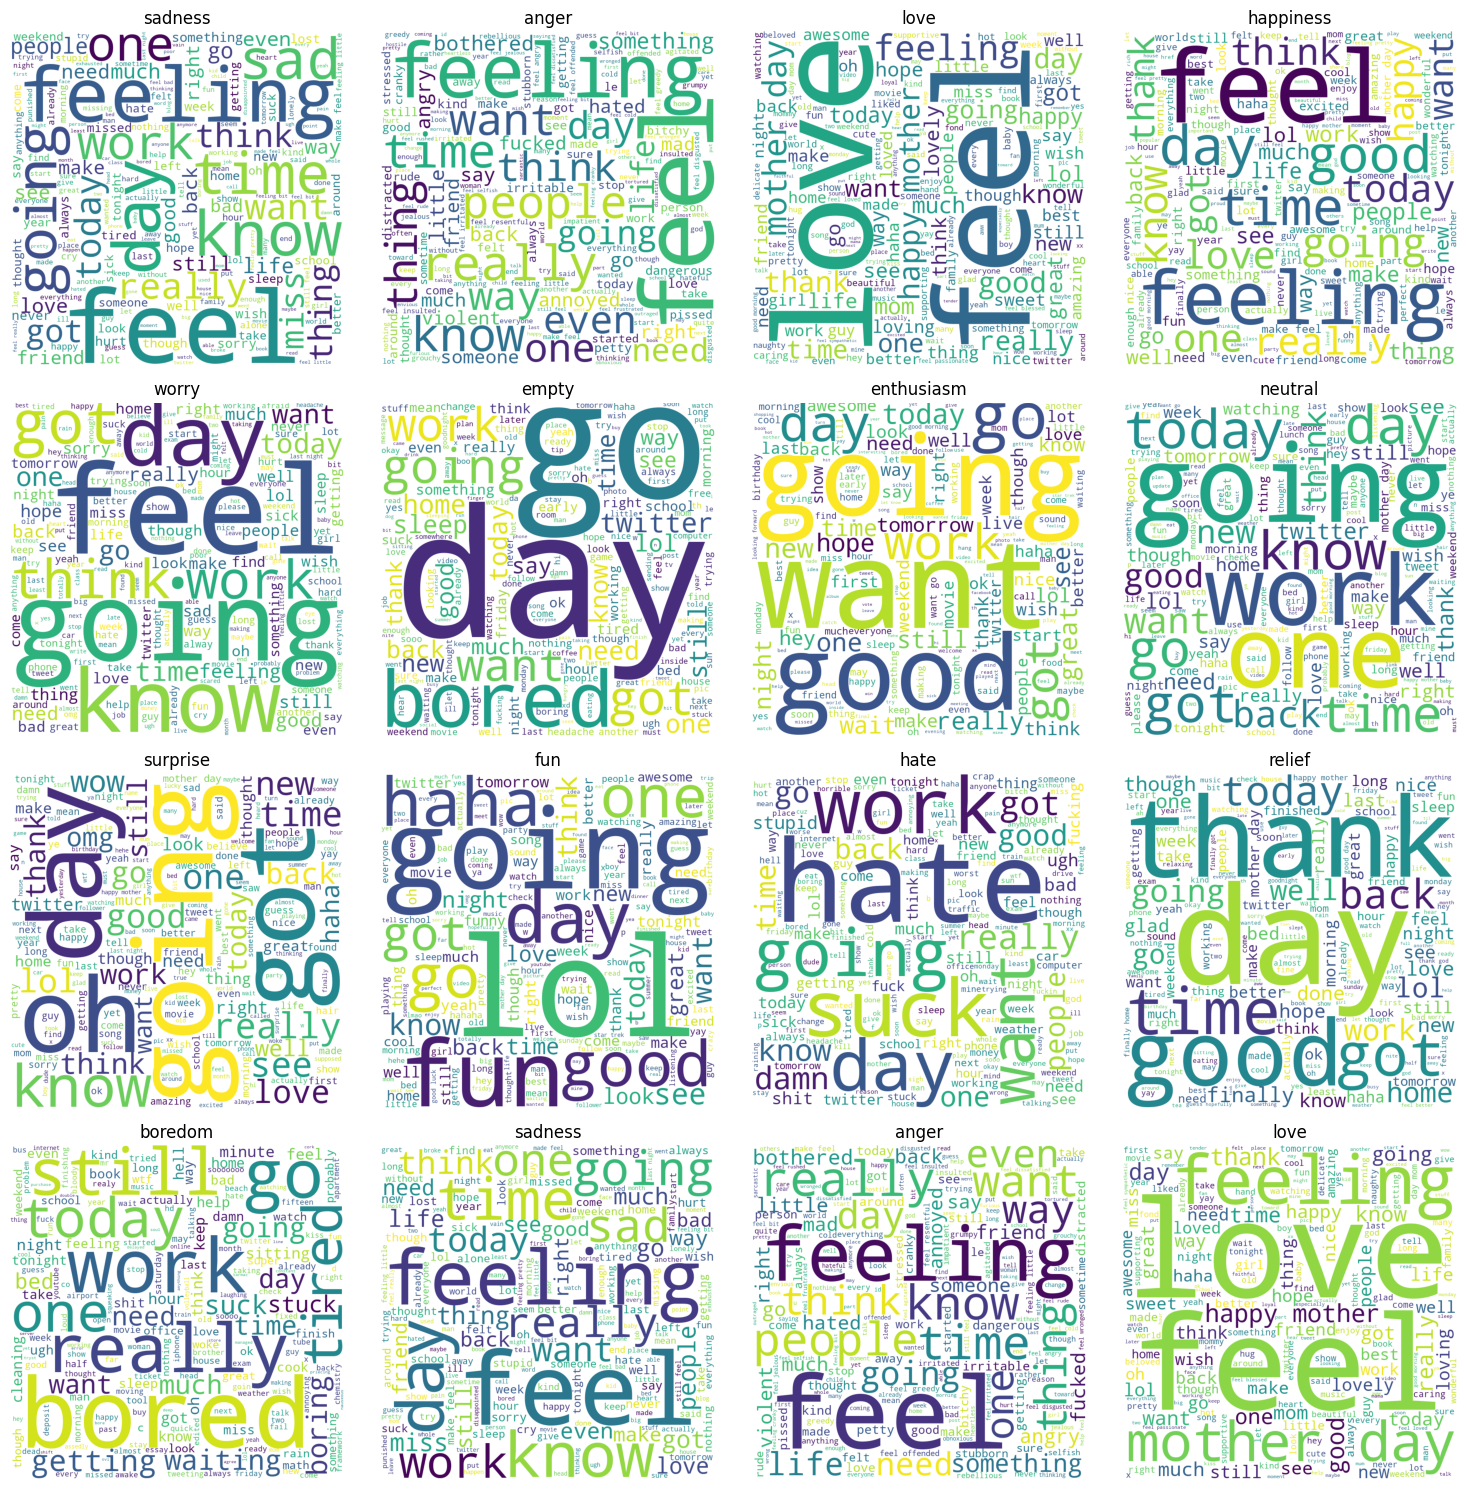

In [68]:
from wordcloud import WordCloud

sentiments = df_clean['sentiment'].unique()
sentiments = list(sentiments)
sentiments = list(sentiments) + list(sentiments[:3])

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for ax, sentiment in zip(axes.flatten(), sentiments):
    text = " ".join(df_clean[df_clean['sentiment'] == sentiment]['content'])
    cloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    ax.imshow(cloud)
    ax.set_title(sentiment)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [69]:
df_train = df_clean.copy()

In [70]:
def conf_matrix(y, y_pred, labels, title):
    fig, ax =plt.subplots(figsize=(10,10))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":15})
    ax.xaxis.set_ticklabels(labels, fontsize=10) 
    ax.yaxis.set_ticklabels(labels, fontsize=10)
    plt.title(title, fontsize=20)
    ax.set_ylabel('Test', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)
    plt.show()

In [71]:
# Splitting the dataset into training and testing sets

def split_data(df):
    train = df.copy()

    x = np.array(train['content'].values)
    y = np.array(train['sentiment'].values)

    # convert categorical to numeric
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    labels = np.unique(encoder.inverse_transform(y))

    # split data on train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

    tf = TfidfVectorizer(analyzer='word', max_features=1000, ngram_range=(1,3))
    x_train = tf.fit_transform(x_train).toarray()
    x_test = tf.transform(x_test).toarray()

    return x_train, x_test, y_train, y_test, labels

In [72]:
# Tuning the best hyperparameters
# Uncomment this and this notebook will take much longer to run
'''
def LogR_train_grid(X, x, Y, y, l):
    params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.1, 1],}
    lr = LogisticRegression()
    grid = GridSearchCV(lr, param_grid=params, cv=4)      
    grid.fit(X, Y)
    y_pred = grid.predict(x)
    accuracy = grid.score(x, y)
    return accuracy, grid.best_params_

X_train, X_test, y_train, y_test, labels = split_data(df_train)

accuracy, best_param = LogR_train_grid(X_train, X_test, y_train, y_test, labels)

print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Best parametrs: ', best_param)
'''

"\ndef LogR_train_grid(X, x, Y, y, l):\n    params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.1, 1],}\n    lr = LogisticRegression()\n    grid = GridSearchCV(lr, param_grid=params, cv=4)      \n    grid.fit(X, Y)\n    y_pred = grid.predict(x)\n    accuracy = grid.score(x, y)\n    return accuracy, grid.best_params_\n\nX_train, X_test, y_train, y_test, labels = split_data(df_train)\n\naccuracy, best_param = LogR_train_grid(X_train, X_test, y_train, y_test, labels)\n\nprint('Accuracy: {:.2f}%'.format(accuracy*100))\nprint('Best parametrs: ', best_param)\n"

In [73]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\91620\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train: 46.47%
Accuracy on test: 43.06%

Classification Report:

               precision    recall  f1-score   support

       anger       0.76      0.38      0.51       556
     boredom       0.00      0.00      0.00        35
       empty       0.00      0.00      0.00       151
  enthusiasm       0.00      0.00      0.00       146
         fun       0.07      0.01      0.02       349
   happiness       0.48      0.65      0.55      2482
        hate       0.36      0.14      0.20       259
        love       0.52      0.33      0.41      1043
     neutral       0.34      0.56      0.42      1599
      relief       0.41      0.04      0.07       295
     sadness       0.50      0.48      0.49      2151
    surprise       0.26      0.04      0.06       424
       worry       0.36      0.40      0.38      2110

    accuracy                           0.43     11600
   macro avg       0.31      0.23      0.24     11600
weighted avg       0.42      0.43      0.40     11600



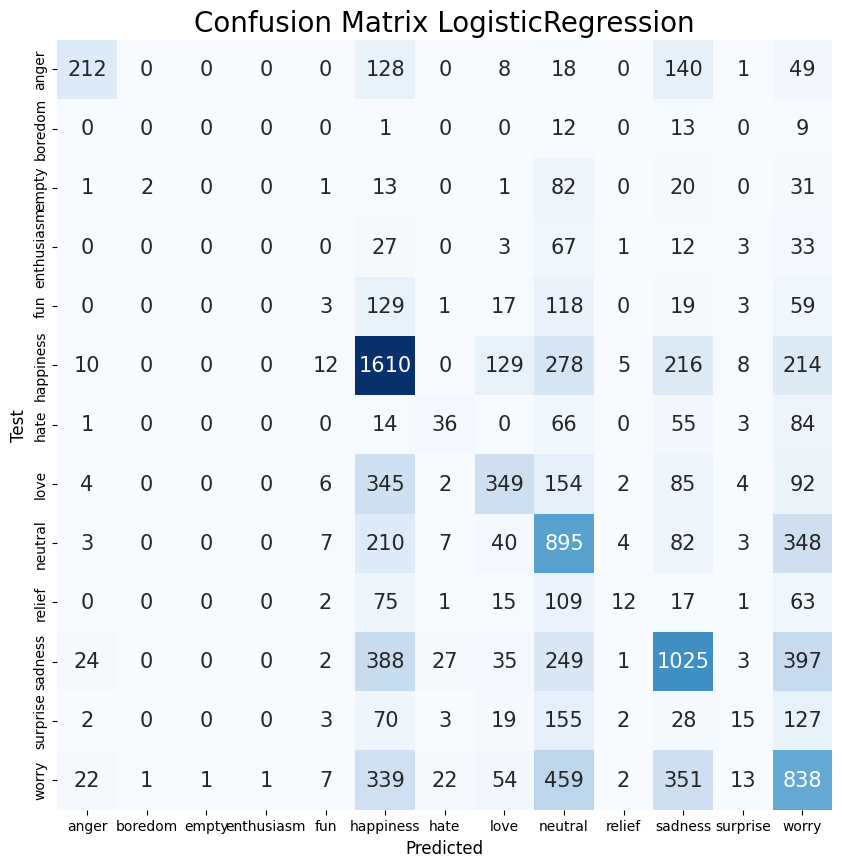

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


def LogR_train(X, x, Y, y, l):
    lr = LogisticRegression()
    lr = LogisticRegression(penalty='l2', C=1)
    lr.fit(X, Y)
    y_pred = lr.predict(x)
    accuracy_test = lr.score(x, y)
    accuracy_train = lr.score(X, Y)
    return accuracy_test, accuracy_train, y, y_pred

X_train, X_test, y_train, y_test, labels = split_data(df_train)

accuracy_test, accuracy_train, y, y_pred = LogR_train(X_train, X_test, y_train, y_test, labels)


print('Accuracy on train: {:.2f}%'.format(accuracy_train*100))
print('Accuracy on test: {:.2f}%'.format(accuracy_test*100))
print('\nClassification Report:\n\n',classification_report(y , y_pred, target_names=[str(l) for l in labels]))
conf_matrix(y, y_pred, labels, 'Confusion Matrix LogisticRegression')

# def split_data(df_train):
#     X = df_train['content']
#     y = df_train['sentiment']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     return X_train, X_test, y_train, y_test, df_train['sentiment'].unique()


In [75]:
# Create stacking with two estimators: Random Forest and Linear SVC, and a logistic regression as the final estimator

def stacking(X, x, Y, y, l):

    estimators = [
      ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=10, max_depth = 4, max_features='log2')),
      ('svr', LinearSVC(dual=False, random_state=42))
      ]
    clf_stck = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(penalty='l2', C=1))
    clf_stck.fit(X, Y)

    y_pred = clf_stck.predict(x)

    accuracy_test = clf_stck.score(x, y)
    accuracy_train = clf_stck.score(X, Y)

    return accuracy_test, accuracy_train, y, y_pred

# X_train, X_test, y_train, y_test, labels = split_data(df_train)

# accuracy_test, accuracy_train, y, y_pred = stacking(X_train, X_test, y_train, y_test, labels)

# print('Accuracy on train: {:.2f}%'.format(accuracy_train*100))
# print('Accuracy on test: {:.2f}%'.format(accuracy_test*100))
# print('\nClassification Report:\n\n',classification_report(y , y_pred, target_names=[str(l) for l in labels]))
# conf_matrix(y, y_pred, labels, 'Confusion Matrix Stack')

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

# def stacking(X_train, X_test, y_train, y_test, l):
#     # Define the base estimators
#     estimators = [
#         ('rf', RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=4, max_features='sqrt')),
#         ('svc', SVC(kernel='linear', C=1, probability=True, random_state=42))
#     ]

#     # Define the stacking classifier with XGBoost as the final estimator
#     clf_stck = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier())

#     # Train the stacking classifier
#     clf_stck.fit(X_train, y_train)

#     # Make predictions
#     y_pred = clf_stck.predict(X_test)

#     # Calculate accuracy
#     accuracy_test = clf_stck.score(X_test, y_test)
#     accuracy_train = clf_stck.score(X_train, y_train)

#     return accuracy_test, accuracy_train, y_test, y_pred

# Example usage:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# accuracy_test, accuracy_train, y_test, y_pred = stacking(X_train, X_test, y_train, y_test, l)


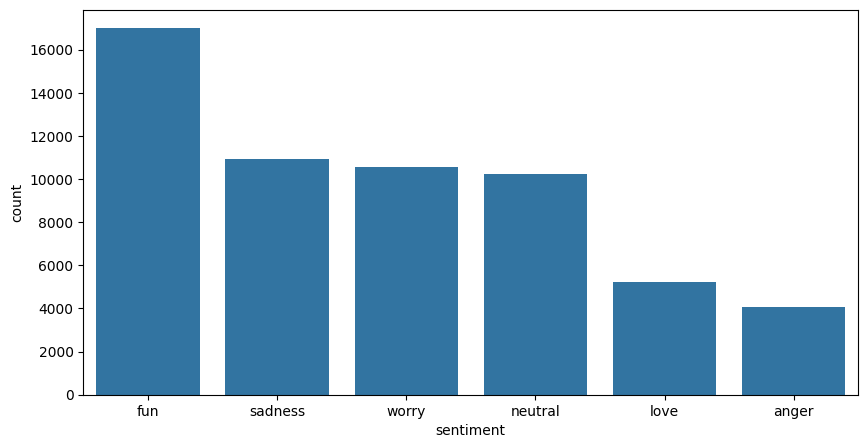

In [76]:
df_reduce = df_train.copy()

df_reduce['sentiment'] = df_reduce['sentiment'].replace(['happiness', 'enthusiasm', 'surprise'], 'fun')
df_reduce['sentiment'] = df_reduce['sentiment'].replace('boredom', 'sadness')
df_reduce['sentiment'] = df_reduce['sentiment'].replace('hate', 'anger')
df_reduce['sentiment'] = df_reduce['sentiment'].replace(['relief', 'empty'], 'neutral')

plt.figure(figsize=(10,5))
ax = sns.countplot(x='sentiment', data=df_reduce, order=df_reduce['sentiment'].value_counts().index)

plt.show()

C:\Users\91620\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train: 51.03%
Accuracy on test: 46.81%

Classification Report:

               precision    recall  f1-score   support

       anger       0.63      0.30      0.41       815
         fun       0.49      0.64      0.56      3401
        love       0.55      0.28      0.37      1043
     neutral       0.39      0.54      0.45      2045
     sadness       0.53      0.45      0.49      2186
       worry       0.40      0.31      0.35      2110

    accuracy                           0.47     11600
   macro avg       0.50      0.42      0.44     11600
weighted avg       0.48      0.47      0.46     11600



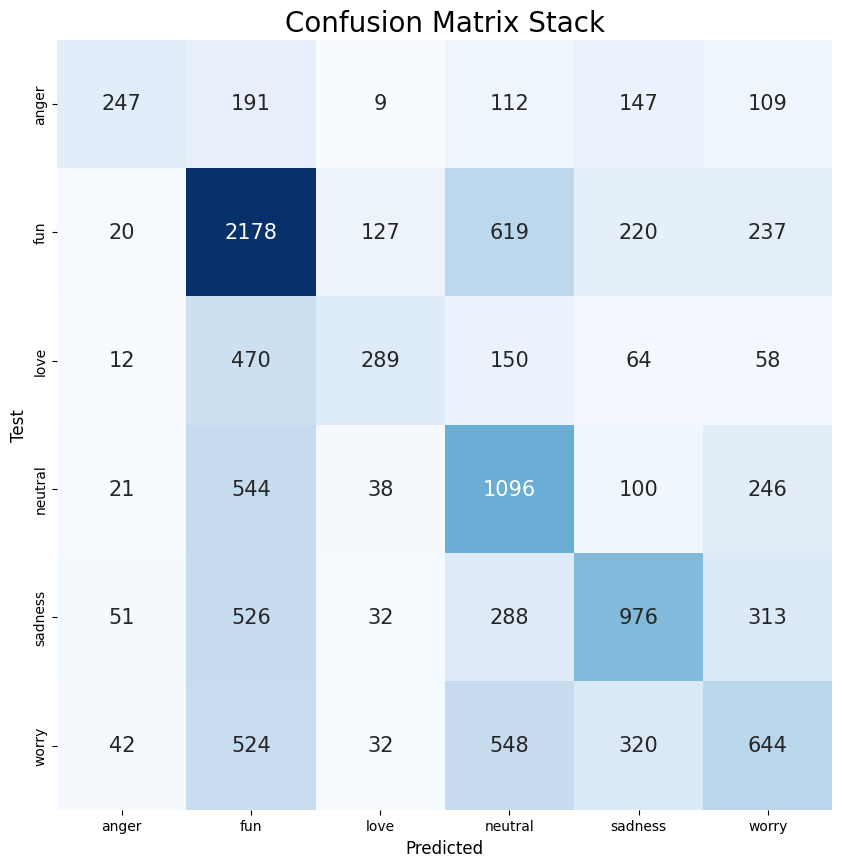

In [77]:
X_train, X_test, y_train, y_test, labels = split_data(df_reduce)

# accuracy_test, accuracy_train, y, y_pred = stacking(X_train, X_test, y_train, y_test, labels)
accuracy_test, accuracy_train, y, y_pred = LogR_train(X_train, X_test, y_train, y_test, labels)

print('Accuracy on train: {:.2f}%'.format(accuracy_train*100))
print('Accuracy on test: {:.2f}%'.format(accuracy_test*100))
print('\nClassification Report:\n\n',classification_report(y , y_pred, target_names=[str(l) for l in labels]))
conf_matrix(y, y_pred, labels, 'Confusion Matrix Stack')

In [78]:
def LogR_train1(X, Y):
    lr = LogisticRegression()
    lr = LogisticRegression(penalty='l2', C=1)
    lr.fit(X, Y)
    return lr

In [79]:
x = data['content'].to_numpy()
y = data['sentiment'].to_numpy()

tf = TfidfVectorizer(analyzer='word', max_features=1000, ngram_range=(1,3))
x = tf.fit_transform(x).toarray()

# convert categorical to numeric
encoder = LabelEncoder()
y = encoder.fit_transform(y)
labels = np.unique(encoder.inverse_transform(y))

lr = LogR_train1(x,y)

C:\Users\91620\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
Test = ["I'm feel better"]
Test = tf.transform(Test).toarray()
ans = lr.predict(Test)
fin_ans = (encoder.inverse_transform(ans))
# encoder.inverse_transform(y)

print(fin_ans)

['happiness']
